# Modul 1 - Kasus No. 6

Topik : Kasus Prediksi Harga Unit Rumah Berdasarkan Ciri-cirinya

Pertanyaan:
1. Pisahkan data hasil kasus 5 menjadi 70% sebagai data latih dan 30% sebagai data test
2. Lakukan pelatihan dan pengetesan model dengan data pada pertanyaan 1
3. isahkan data hasil kasus 5 menjadi 80% sebagai data latih dan 20% sebagai data test
4. Lakukan pelatihan dan pengetesan model dengan data pada pertanyaan 1
5. Bandingkan hasil akurasi prediksi dengan komposisi data latih dan test yang berbeda. Apakah ada beda signifikan?

References:
https://www.tensorflow.org/tutorials/keras/regression


## Import Library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/modul-1/Real estate.csv


## Load Real Estate Dataset

In [2]:
df = pd.read_csv("/kaggle/input/modul-1/Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Pre-processing Data

Melakukan pra-pemrosesan terhadap data sebelum digunakan. Pada bagian ini akan melakukan "pembersihan" dan "perapihan" data. Tahapan

### Cleaning Null Data
Melakukan pengecekan apakah terdapat data nilai kosong. Pada kasus ini data kosong akan dibuang karena data dianggap tidak lengkap.

In [3]:
### Sintaks ini berguna untuk mengecek jumlah nilai null dari setiap atribut data.
### Jika terdapat nilai null, maka akan ditampilkan jumlahnya.
### Jika tidak terdapat nilai null, maka akan ditampilkan nilai 0.

df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [4]:
### Jika terdapat nilai null maka gunakan sintaks dibawah berikut.

df = df.dropna()

### Drop Columns

Pada bagian ini, data yang tidak terpakai akan dilakukan pembuangan.

In [5]:
df = df.drop(columns = ['No','X1 transaction date'])

### Create HeatMap

Pada bagian ini akan melakukan analisa mengenai hubungan antara fitur dengan target. Hal ini berguna untuk membuang fitur yang tidak berhubungan dengan target dan yang berpotensi untuk memngganggu pembelajaran model.

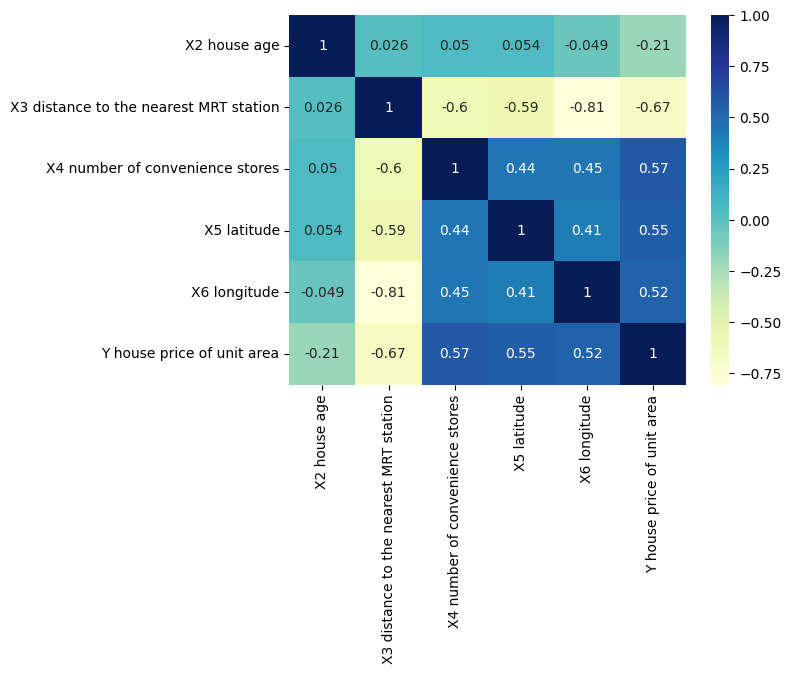

In [6]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Split Feature and Target

Pada bagian ini akan memisahkan data yang menjadi ciri rumah dan nilai yang akan digunakan sebagai target prediksi. Pada kasus ini, harga rumah menjadi target prediksi, maka akan dilakukan pemisahan. Pada kasus ini, berdasarkan heatmap, fitur yang akan diambil adalah **X3 distance to the nearest MRT station** dan **X4 number of convenience stores**

In [7]:
X = df[[
    # "X1 transaction date",
    # "X2 house age",
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores",
    # "X5 latitude",
    # "X6 longitude"         
]].copy()
Y = df["Y house price of unit area"].copy()

In [8]:
print(X.columns.values)
print(Y)

['X3 distance to the nearest MRT station'
 'X4 number of convenience stores']
0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


### MinMax Scaler

Pada bagian ini akan melakukan proses MinMax Scaler untuk menyederhanakan nilai fitur yang bersifat numerik. Kegunaan dari proses ini adalah untuk mempermudah model dalam mempelajari pola yang berupa angka lebih kecil dibandingkan angka sebenarnya yang bernilai lebih besar.

In [9]:
X['X3 distance to the nearest MRT station'] = MinMaxScaler().fit_transform(np.sqrt(X['X3 distance to the nearest MRT station'].values).reshape(-1, 1))
X['X4 number of convenience stores'] = MinMaxScaler().fit_transform(np.sqrt(X['X4 number of convenience stores'].values).reshape(-1, 1))
Y = MinMaxScaler().fit_transform(np.sqrt(Y.values).reshape(-1, 1))

## Function for Model Creation

Pada bagian ini akan menjelaskan pembangunan model prediksi harga rumah. Pada kasus ini akan membangun dengan arsitektur ANN (Artificial Neural Network).

Pembangunan model ANN dapat dibantu dengan menggunakan library TensorFlow dengan bantuan fungsi Sequential dan Dense. 

Fungsi Sequential berguna untuk menampung dan menjalankan berbagai jenis layer secara sekuensial. 

Fungsi Dense berguna untuk memanggil jenis layer Dense atau ANN.

In [10]:
### Terdapat 3 layers.
### Layer pertama adalah Input Layer yang didefinisikan pada input_shape
### Layer kedua adalah Hidden Layer yang didefinisikan pada fungsi Dense pertama dengan jumlah node 8
### Layer ketiga adalah Output layer yang didefinisikan pada fungsi Dense kedua dengan jumlah node 1

def create_model():
    model = Sequential([
        Dense(1, input_shape=(X.columns.shape[0],)),  
        ### input shape berfungsi untuk menentukan jumlah masukkan fitur
    ])

    ### Compile model berguna untuk mengisi optimizer, loss, dan metrik evaluasi.

    model.compile(optimizer='adam', loss='mse')
    
    return model

## Kasus Pertama (Melatih model dengan ratio 70:30)

### Splitting Data Between Train Data and Test Data (70:30)

Pada bagian ini akan melakukan pembagian data latih dan data uji. Selayaknya mahasiswa yang memerlukan bahan belajar dan ujian. Analosi data latih terletak sebagai data belajar dan data uji sebagai soal ujian. 

Data latih berguna untuk memberikan pembelajaran pada model AI yang akan dilatih dan data uji berguna untuk menguji kemampuan model AI yang telah melalui proses pembelajaran.

Ratio pembagian akan lebih besar pada data latih dibandingkan data data uji. Pada kasus ini, ratio akan berupa 70:30

In [11]:
### Pemisahan data latih dan data uji dengan fungsi train_test_split().
### Parameter :
### frac         = menentukan ratio jumlah data latih yang akan diambil.
### random_state = berfungsi untuk menghasilkan hasil acak yang sama jika
###                diinput dengan angka yang sama.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

### Build Prediction Model



In [12]:
model_kasus_1 = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


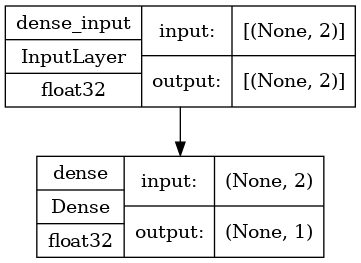

In [13]:
### Untuk melihat hasil dari model yang telah dibangun dapat dilakukan dengan model summary
### Untuk hasil berupa gambar dapat menggunkana fungsi plot_model

model_kasus_1.summary()
plot_model(model_kasus_1, show_dtype=True, show_layer_names=True, show_shapes=True) 

### Train and Evaluate Model

Pada bagian akan menjelaskan bagaimana cara model dilatih dan dievaluasi kinerjanya.

#### Train Model

Pada bagian ini akan melakukan pelatihan terhadap model AI. Fungsi Fit() berguna untuk melatih model dengan data latih.<br><br>
Parameter yang wajib diisi:<br>
Fitur Data Latih  = X_Train<br>
Target Data Latih = Y_Train<br>
Epochs            = Berapa kali perputaran melatih model<br>
Verbose           = Keluaran output proses pelatihan

In [14]:
hist = model_kasus_1.fit(X_train, Y_train, epochs=500, verbose=1)

Epoch 1/500
10/10 [==============================] - 1s 3ms/step - loss: 0.1465
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1351
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1248
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1155
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1069
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0991
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0918
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0859
Epoch 9/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0800
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0748
Epoch 11/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0704
Epoch 12/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0660
Epoch 13/500
10/10 [=================

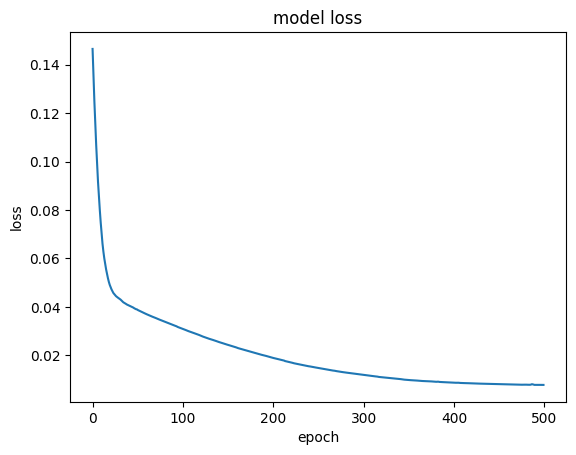

In [16]:
### Melihat perjalanan dari loss pada setiap epoch

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#### Evaluasi Model

Pada bagian ini akan melakukan evaluasi terhadap kinerja model. Pada kasus regresi menggunakan evaluasi metriks Mean Squared Error. Hal ini dilakukan dengan melakukan prediksi dengan data uji dan dihitung menggunakan fungsi mean_squared_error(). Hasil akhir dari fungsi mean_squared_error() akan dirata-ratakan kembali untuk melihat hasil secara keseluruhan.

In [17]:
pred = model_kasus_1.predict(X_test)
result_70_30 = mean_squared_error(Y_test, pred)
print(result_70_30)

4/4 [==============================] - 0s 2ms/step
0.008415062106859416


> Pada kasus ini menunjukkan bahwa hasil dari pelatihan memberikan nilai kinerja sedemikian rupa. Kinerja tersebut didapatkan dengan melakukan pembagian antara data latih 70:30.

> Seperti analoginya, jika data latih semakin banyak, maka seharusnya model akan semakin pintar. Mari kita coba ubah ratio menjadi 80:20 sebagai kasus 2

## Kasus Kedua (Melatih model dengan ratio 80:20)

Pada kasus kedua ini akan mengulang langkah pada kasus pertama, tetapi ratio pembagian data latih dan data uji kita ubah menjadi 80:20

### Splitting Data Between Train Data and Test Data (80:20)

Pada bagian ini akan melakukan pembagian data latih dan data uji dengan ratio 80:20

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

### Build Prediction Model

In [19]:
model_kasus_2 = create_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


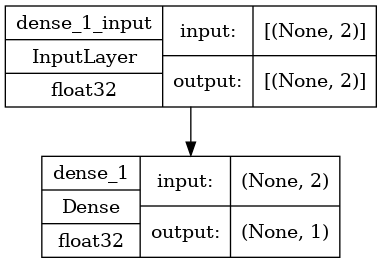

In [20]:
model_kasus_2.summary()
plot_model(model_kasus_2, show_dtype=True, show_layer_names=True, show_shapes=True) 

### Train and Evaluate Model

#### Train Model

In [21]:
hist = model_kasus_2.fit(X_train, Y_train, epochs=500, verbose=1)

Epoch 1/500
11/11 [==============================] - 0s 2ms/step - loss: 1.0499
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 1.0083
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 0.9678
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 0.9282
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 0.8900
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 0.8529
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 0.8169
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 0.7822
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 0.7486
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 0.7162
Epoch 11/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6846
Epoch 12/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6542
Epoch 13/500
11/11 [=================

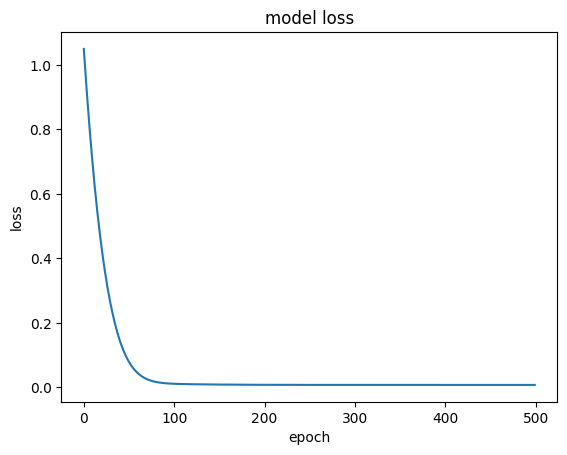

In [22]:
### Melihat perjalanan dari loss pada setiap epoch

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#### Evaluasi Model

In [23]:
pred = model_kasus_2.predict(X_test)
result_80_20 = mean_squared_error(Y_test, pred)
print(result_80_20)

3/3 [==============================] - 0s 2ms/step
0.0072790919069781876


## Model Performance Analysis

Lakukan analisa berdasarkan dari hasil kedua kasus

In [24]:
print("Kasus 1 (70:30):",result_70_30)
print("Kasus 2 (80:20):",result_80_20)

Kasus 1 (70:30): 0.008415062106859416
Kasus 2 (80:20): 0.0072790919069781876
